# Data Cleaning

In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

# All Data except for gym ratio

In [2]:
# Store file names, desired areas, and desired states in lists
file_names = ["lat_lon", "population", "commute",\
             "atlanta_housing", "chicago_housing", "dallas_housing", "denver_housing"]

# areas = ["Atlanta", "Chicago", "Dallas", "Denver", "Detroit", "Los Angeles", "Miami", "New York", "Philadelphia"]
# states = ["GA", "IL", "TX", "CO", "MI", "CA", "FL", "NY", "PA"]
# areas = ["Atlanta", "Boston", "Chicago", "Dallas", "Denver", "Los Angeles", "New York", "St Louis"]
# states = ["GA", "MA", "IL", "TX", "CO", "CA", "NY", "MO"]

In [3]:
# Get areas and states
df = pd.read_csv("resources/gym_ratio_region.csv")
df = df.sort_values("city")
areas = df["city"]
states = df["state"]
gym_ratio = list(df["ratio%"])
total_gyms_per_k_people = list(df["total_gyms_per_thousand_people"])
total_24_gyms_per_k_people = list(df["24_hour_gyms_per_thousand_people"])
gym_ratio_series = df["ratio%"]
region = list(df["Region"])

In [4]:
# define function to read csv files:
def get_file():
    global df
    data = pd.read_csv(f"resources/{file_name}.csv", encoding="ISO-8859-1", header=None, error_bad_lines=False)  
    df = pd.DataFrame(data)
    print(f"\nraw: {file_name}")
    return df

# Latitudes and Longitudes

In [5]:
# extract latitudes and longitudes
file_name = "lat_lon"

# Get raw data from all files and print out
get_file()
df = df.replace(r'\n',' ', regex=True) 
df = df.reset_index()
df = df.loc[2:, [2,3,5,6]]
columns = ["state", "area", "latitude", "longitude"]
df.columns = columns

# Get desired data from DataFrame:
df_list = pd.DataFrame(columns=columns, data=None)

# Loop through area list and state list to get data
for i in range(len(areas)):
    df_i = df[(df["area"]==areas[i]) & (df["state"]==states[i])]
    df_i = df_i.groupby("area").first().reset_index()
    df_list = df_list.append(df_i)
df = pd.DataFrame(columns=columns, data=df_list)

# Adjust display of data
df = df.iloc[:(len(areas)+1),:]
df = df.reset_index(drop=True)
df = df.sort_values("area").reset_index(drop=True)

mega_df = df
df.head()


raw: lat_lon


,state,area,latitude,longitude
0,NM,Albuquerque,35.0441,-106.8904
1,TX,Arlington,32.6904,-97.1343
2,GA,Atlanta,33.8477,-84.2814
3,TX,Austin,30.2058,-97.8002
4,MD,Baltimore,39.2904,-76.6122


In [6]:
mega_df

,state,area,latitude,longitude
0,NM,Albuquerque,35.0441,-106.8904
1,TX,Arlington,32.6904,-97.1343
2,GA,Atlanta,33.8477,-84.2814
3,TX,Austin,30.2058,-97.8002
4,MD,Baltimore,39.2904,-76.6122
5,MA,Boston,42.3496,-71.0746
6,NC,Charlotte,35.1232,-80.9343
7,IL,Chicago,41.9288,-87.6315
8,CO,Colorado Springs,38.8609,-104.8734
9,OH,Columbus,39.8928,-82.9588


# Population

In [7]:
# Variables
file_name = "population"

# Get raw data from the file
get_file()
df = df.rename(columns=df.iloc[0])
df = df.drop([0], axis=0)
df = df[["city", "state_id", "population_proper"]]
df = df.rename(columns={"city":"area", "state_id":"state", "population_proper":"population"})
df["population"] = pd.to_numeric(df["population"])
df = df.sort_values("population", ascending=False)
df = df.loc[:100, :]
df = df.reset_index(drop=True)
df.head()


raw: population


/anaconda3/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2850: DtypeWarning: Columns (4,6,7,8,9,10,12,15) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


,area,state,population
0,New York,NY,8537673.0
1,Los Angeles,CA,3976322.0
2,Chicago,IL,2704958.0
3,Brooklyn,NY,2629150.0
4,Queens,NY,2333054.0


In [8]:
# Loop through area list and state list to get data
df = df.drop_duplicates(subset="area")
df_list = []
new_df = pd.DataFrame()
for i in range(len(areas)):
    df_i = df[(df["area"]==areas[i]) & (df["state"]==states[i])]
    df_i = df_i.groupby("area").first().reset_index()
    new_df = new_df.append(df_i)
df = new_df
columns = ["area", "state", "population"]
df = df.reset_index(drop=True)
df = df.sort_values("area").reset_index(drop=True)
df = df.drop_duplicates(subset="area")
df = df.reset_index(drop=True)
df["population_log10"] = np.log10(df["population"])

# Append to mega dataframe
mega_df = pd.merge(mega_df, df, on="area", how="outer")
mega_df = mega_df.T.drop_duplicates().T
mega_df = mega_df.loc[:len(areas),:]
mega_df = mega_df.rename(columns={"state_x":"state"})
df.head()

,area,state,population,population_log10
0,Albuquerque,NM,559277.0,5.747627
1,Arlington,TX,392772.0,5.594141
2,Atlanta,GA,472522.0,5.674422
3,Austin,TX,947890.0,5.976758
4,Baltimore,MD,614664.0,5.788638


In [9]:
mega_df

,state,area,latitude,longitude,population,population_log10
0,NM,Albuquerque,35.0441,-106.89,559277,5.74763
1,TX,Arlington,32.6904,-97.1343,392772,5.59414
2,GA,Atlanta,33.8477,-84.2814,472522,5.67442
3,TX,Austin,30.2058,-97.8002,947890,5.97676
4,MD,Baltimore,39.2904,-76.6122,614664,5.78864
5,MA,Boston,42.3496,-71.0746,673184,5.82813
6,NC,Charlotte,35.1232,-80.9343,842051,5.92534
7,IL,Chicago,41.9288,-87.6315,2.70496e+06,6.43216
8,CO,Colorado Springs,38.8609,-104.873,465101,5.66755
9,OH,Columbus,39.8928,-82.9588,860090,5.93454


# Commute

In [10]:
# Get data from file
file_name = "commute"
# Get raw data from all files and print out
get_file()
df = df.loc[2:, [2,3]]
columns = ["area", file_name]
df.columns = columns  
df["area"] = df["area"].str.split(" city", 1).str[0]
df["area"] = df["area"].str.split("-", 1).str[0]

# Get data for desired areas
df = df.loc[range(len(areas)), columns]
columns = ["area", file_name]
df = df[columns].sort_values("area")
df = df.reset_index(drop=True)
print(f"\n\nclean: {file_name}")
print(df.head())
mega_df = pd.merge(mega_df, df, on="area", how="outer")
mega_df = mega_df.T.drop_duplicates().T

# Add calucation column to mega_df
values = mega_df["commute"].astype(float)/mega_df["population"].astype(float)
mega_df["commute/person"] = values
mega_df = mega_df.loc[:(len(areas)-1),:]
print("\n\nfinal:")
df.head()


raw: commute


clean: commute
          area   commute
0  Albuquerque   5247440
1    Arlington   4841405
2      Atlanta   5174585
3       Austin  11050490
4    Baltimore   7943390


final:


/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:12: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


,area,commute
0,Albuquerque,5247440
1,Arlington,4841405
2,Atlanta,5174585
3,Austin,11050490
4,Baltimore,7943390


In [11]:
mega_df

,state,area,latitude,longitude,population,population_log10,commute,commute/person
0,NM,Albuquerque,35.0441,-106.89,559277,5.74763,5247440,9.382542
1,TX,Arlington,32.6904,-97.1343,392772,5.59414,4841405,12.326248
2,GA,Atlanta,33.8477,-84.2814,472522,5.67442,5174585,10.950993
3,TX,Austin,30.2058,-97.8002,947890,5.97676,11050490,11.657988
4,MD,Baltimore,39.2904,-76.6122,614664,5.78864,7943390,12.923142
5,MA,Boston,42.3496,-71.0746,673184,5.82813,10172825,15.111507
6,NC,Charlotte,35.1232,-80.9343,842051,5.92534,9584770,11.382648
7,IL,Chicago,41.9288,-87.6315,2.70496e+06,6.43216,41573345,15.369313
8,CO,Colorado Springs,38.8609,-104.873,465101,5.66755,4365970,9.387144
9,OH,Columbus,39.8928,-82.9588,860090,5.93454,8782095,10.210670


# Spending

In [12]:
# Save file names in a list
file_name_list = ["midwest_expenditure", "northeast_expenditure", "south_expenditure", "west_expenditure"]
temp_df = pd.DataFrame()

# Loop through file names to find data
for file_name in file_name_list:
    data = pd.read_excel(f"resources/{file_name}.xlsx", header=None, error_bad_lines=False)  
    df = pd.DataFrame(data)
    df = df.replace(r'\n',' ', regex=True) 
    print(f"\nraw: {file_name}")
    df = df[(df[0]=="Item") | (df[0]=="Personal care products and services")]
    del(df[0])
    del(df[1])
    df.iloc[0,:] = df.iloc[0,:].str.split('-', 1).str[0]
    temp_df = pd.concat([temp_df, df], axis=1)

# Save desired rows in a dataframe
new_df = pd.DataFrame()
columns = ["area", "spending"]
for i in range(len(temp_df.columns)):
    new_df.loc["region", i] = temp_df.iloc[0,i]
    new_df.loc["spending", i] = temp_df.iloc[1,i]

# Transpose dataframe and find desired areas
new_df = new_df.T
new_df = new_df.sort_values("region").reset_index(drop=True)
new_df = new_df.rename(columns={"region":"area"})
new_df = new_df[new_df["area"].isin(areas)]     
new_df = new_df.reset_index(drop=True)
print(new_df)

# Add data to mega datafame
mega_df = pd.merge(mega_df, new_df, on="area", how="outer")
mega_df = mega_df.T.drop_duplicates().T
mega_df = mega_df.reset_index(drop=True)
print("\n\nfinal:")
df.head()


raw: midwest_expenditure

raw: northeast_expenditure

raw: south_expenditure

raw: west_expenditure
             area spending
0         Atlanta      573
1       Baltimore      872
2          Boston      743
3         Chicago      755
4          Dallas      793
5          Denver      969
6         Detroit      905
7         Houston      981
8     Los Angeles      823
9           Miami      635
10    Minneapolis     1106
11       New York      742
12   Philadelphia      753
13        Phoenix      775
14      San Diego     1137
15  San Francisco      842
16        Seattle      878


final:


,2,3,4,5,6,7,8,9
2,Los Angeles,San Francisco,San Diego,Seattle,Phoenix,Denver,Honolulu,Anchorage
53,823,842,1137,878,775,969,746,791


In [13]:
mega_df

,state,area,latitude,longitude,population,population_log10,commute,commute/person,spending
0,NM,Albuquerque,35.0441,-106.89,559277,5.74763,5247440,9.38254,NaN
1,TX,Arlington,32.6904,-97.1343,392772,5.59414,4841405,12.3262,NaN
2,GA,Atlanta,33.8477,-84.2814,472522,5.67442,5174585,10.951,573
3,TX,Austin,30.2058,-97.8002,947890,5.97676,11050490,11.658,NaN
4,MD,Baltimore,39.2904,-76.6122,614664,5.78864,7943390,12.9231,872
5,MA,Boston,42.3496,-71.0746,673184,5.82813,10172825,15.1115,743
6,NC,Charlotte,35.1232,-80.9343,842051,5.92534,9584770,11.3826,NaN
7,IL,Chicago,41.9288,-87.6315,2.70496e+06,6.43216,41573345,15.3693,755
8,CO,Colorado Springs,38.8609,-104.873,465101,5.66755,4365970,9.38714,NaN
9,OH,Columbus,39.8928,-82.9588,860090,5.93454,8782095,10.2107,NaN


# Wage and hour

In [14]:
# Open file
file_name = "wage_and_hour"
data = pd.read_excel(f"resources/{file_name}.xlsx", header=None, error_bad_lines=False)
data = data.replace(r'\n',' ', regex=True)

In [15]:
# Get desired data
df = data.iloc[5:,[0,1,7]]
df.columns = ["area", "weekly hour", "weekly wage"]
df.loc[:,"area"] = df.loc[:,"area"].str.split('-', 1).str[0]
df = df.reset_index(drop=True)
df = df[df["area"].isin(areas)]
df = df.groupby("area").first()
df = df.reset_index()
df.head()

,area,weekly hour,weekly wage
0,Albuquerque,33.7,785.55
1,Atlanta,34.9,979.29
2,Austin,35.8,1026.03
3,Baltimore,34.5,921.50
4,Boston,34.6,1223.11


In [16]:
# Add data to mega datafame
mega_df = pd.merge(mega_df, df, on="area", how="outer")
mega_df = mega_df.T.drop_duplicates().T
mega_df = mega_df.reset_index(drop=True)
mega_df["region"] = region
print("\n\nfinal:")
mega_df.head()



final:


,state,area,latitude,longitude,population,population_log10,commute,commute/person,spending,weekly hour,weekly wage,region
0,NM,Albuquerque,35.0441,-106.89,559277,5.74763,5247440,9.38254,NaN,33.7,785.55,West
1,TX,Arlington,32.6904,-97.1343,392772,5.59414,4841405,12.3262,NaN,NaN,NaN,South
2,GA,Atlanta,33.8477,-84.2814,472522,5.67442,5174585,10.951,573,34.9,979.29,South
3,TX,Austin,30.2058,-97.8002,947890,5.97676,11050490,11.658,NaN,35.8,1026.03,South
4,MD,Baltimore,39.2904,-76.6122,614664,5.78864,7943390,12.9231,872,34.5,921.5,South


# Precipitation

In [17]:
# Get data from file
df = pd.read_excel("resources/precip.xlsx")

# Get desired cells
df = df.loc[:, ["City","Precipitation(average annual inch)"]]
df = df.rename(columns={"City":"area", "Precipitation(average annual inch)":"precipitation"})
df["area"] = df["area"].str.split(",", 1).str[0]
df["area"] = df["area"].str.split("-", 1).str[0]

# Append to mega_df
mega_df = pd.merge(mega_df, df, on="area", how="left")
mega_df.head()

,state,area,latitude,longitude,population,population_log10,commute,commute/person,spending,weekly hour,weekly wage,region,precipitation
0,NM,Albuquerque,35.0441,-106.89,559277,5.74763,5247440,9.38254,NaN,33.7,785.55,West,9.47
1,TX,Arlington,32.6904,-97.1343,392772,5.59414,4841405,12.3262,NaN,NaN,NaN,South,NaN
2,GA,Atlanta,33.8477,-84.2814,472522,5.67442,5174585,10.951,573,34.9,979.29,South,50.20
3,TX,Austin,30.2058,-97.8002,947890,5.97676,11050490,11.658,NaN,35.8,1026.03,South,33.65
4,MD,Baltimore,39.2904,-76.6122,614664,5.78864,7943390,12.9231,872,34.5,921.5,South,41.94


# Humidity

In [18]:
# Get data from file
df = pd.read_excel("resources/humidity.xlsx")
del(df["state"])
# Get desired cells
print(df)
# Append to mega_df
mega_df = pd.merge(mega_df, df, on="area", how="left")
mega_df.head()

              area  humidity_morning  humidity_afternoon
0          Chicago                80                  57
1         Columbus                80                  57
2          Detroit                81                  58
3     Indianapolis                83                  58
4      Kansas City                81                  55
5        Milwaukee                80                  63
6      Minneapolis                78                  55
7       Birmingham                84                  52
8         New York                71                  54
9     Philadelphia                78                  54
10         Atlanta                81                  52
11          Austin                84                  49
12       Baltimore                77                  52
13       Charlotte                81                  51
14          Dallas                82                  49
15         Houston                90                  55
16    Jacksonville             

,state,area,latitude,longitude,population,population_log10,commute,commute/person,spending,weekly hour,weekly wage,region,precipitation,humidity_morning,humidity_afternoon
0,NM,Albuquerque,35.0441,-106.89,559277,5.74763,5247440,9.38254,NaN,33.7,785.55,West,9.47,NaN,NaN
1,TX,Arlington,32.6904,-97.1343,392772,5.59414,4841405,12.3262,NaN,NaN,NaN,South,NaN,NaN,NaN
2,GA,Atlanta,33.8477,-84.2814,472522,5.67442,5174585,10.951,573,34.9,979.29,South,50.20,81.0,52.0
3,TX,Austin,30.2058,-97.8002,947890,5.97676,11050490,11.658,NaN,35.8,1026.03,South,33.65,84.0,49.0
4,MD,Baltimore,39.2904,-76.6122,614664,5.78864,7943390,12.9231,872,34.5,921.5,South,41.94,77.0,52.0


# Crime rate

In [19]:
# Get data from file
df = pd.read_excel("resources/crime.xlsx")
# Get desired cells
columns = ["area", "crime_total_per_capita"]
df = df[columns]
# Append to mega_df
mega_df = pd.merge(mega_df, df, on="area", how="left")
mega_df.head()

,state,area,latitude,longitude,population,population_log10,commute,commute/person,spending,weekly hour,weekly wage,region,precipitation,humidity_morning,humidity_afternoon,crime_total_per_capita
0,NM,Albuquerque,35.0441,-106.89,559277,5.74763,5247440,9.38254,NaN,33.7,785.55,West,9.47,NaN,NaN,0.012604
1,TX,Arlington,32.6904,-97.1343,392772,5.59414,4841405,12.3262,NaN,NaN,NaN,South,NaN,NaN,NaN,0.010200
2,GA,Atlanta,33.8477,-84.2814,472522,5.67442,5174585,10.951,573,34.9,979.29,South,50.20,81.0,52.0,0.014266
3,TX,Austin,30.2058,-97.8002,947890,5.97676,11050490,11.658,NaN,35.8,1026.03,South,33.65,84.0,49.0,0.004424
4,MD,Baltimore,39.2904,-76.6122,614664,5.78864,7943390,12.9231,872,34.5,921.5,South,41.94,77.0,52.0,0.010556


# Temperature

In [20]:
# Get data from file
df = pd.read_excel("resources/temperature.xlsx")
# Get desired cells
columns = ["area", "high_temp", "low_temp"]
df = df[columns]
# Append to mega_df
mega_df = pd.merge(mega_df, df, on="area", how="left")
mega_df.head()

,state,area,latitude,longitude,population,population_log10,commute,commute/person,spending,weekly hour,weekly wage,region,precipitation,humidity_morning,humidity_afternoon,crime_total_per_capita,high_temp,low_temp
0,NM,Albuquerque,35.0441,-106.89,559277,5.74763,5247440,9.38254,NaN,33.7,785.55,West,9.47,NaN,NaN,0.012604,NaN,NaN
1,TX,Arlington,32.6904,-97.1343,392772,5.59414,4841405,12.3262,NaN,NaN,NaN,South,NaN,NaN,NaN,0.010200,NaN,NaN
2,GA,Atlanta,33.8477,-84.2814,472522,5.67442,5174585,10.951,573,34.9,979.29,South,50.20,81.0,52.0,0.014266,72.0,53.0
3,TX,Austin,30.2058,-97.8002,947890,5.97676,11050490,11.658,NaN,35.8,1026.03,South,33.65,84.0,49.0,0.004424,80.0,59.0
4,MD,Baltimore,39.2904,-76.6122,614664,5.78864,7943390,12.9231,872,34.5,921.5,South,41.94,77.0,52.0,0.010556,65.0,45.0


# Add gym numbers and ratios

In [21]:
mega_df["gym_ratio"] = gym_ratio
mega_df["total_24_gyms_per_k_people"] = total_24_gyms_per_k_people
mega_df["total_gyms_per_k_people"] = total_gyms_per_k_people
mega_df.head()

,state,area,latitude,longitude,population,population_log10,commute,commute/person,spending,weekly hour,...,region,precipitation,humidity_morning,humidity_afternoon,crime_total_per_capita,high_temp,low_temp,gym_ratio,total_24_gyms_per_k_people,total_gyms_per_k_people
0,NM,Albuquerque,35.0441,-106.89,559277,5.74763,5247440,9.38254,NaN,33.7,...,West,9.47,NaN,NaN,0.012604,NaN,NaN,12.90,0.06,0.44
1,TX,Arlington,32.6904,-97.1343,392772,5.59414,4841405,12.3262,NaN,NaN,...,South,NaN,NaN,NaN,0.010200,NaN,NaN,13.84,0.10,0.74
2,GA,Atlanta,33.8477,-84.2814,472522,5.67442,5174585,10.951,573,34.9,...,South,50.20,81.0,52.0,0.014266,72.0,53.0,7.67,0.24,3.17
3,TX,Austin,30.2058,-97.8002,947890,5.97676,11050490,11.658,NaN,35.8,...,South,33.65,84.0,49.0,0.004424,80.0,59.0,4.58,0.06,1.27
4,MD,Baltimore,39.2904,-76.6122,614664,5.78864,7943390,12.9231,872,34.5,...,South,41.94,77.0,52.0,0.010556,65.0,45.0,8.33,0.05,0.55


# Save output file

In [22]:
mega_df.columns

Index(['state', 'area', 'latitude', 'longitude', 'population',
       'population_log10', 'commute', 'commute/person', 'spending',
       'weekly hour', 'weekly wage', 'region', 'precipitation',
       'humidity_morning', 'humidity_afternoon', 'crime_total_per_capita',
       'high_temp', 'low_temp', 'gym_ratio', 'total_24_gyms_per_k_people',
       'total_gyms_per_k_people'],
      dtype='object')

In [23]:
# Save dataframe to file
mega_df = mega_df.fillna(value=0)
mega_df.to_csv("cleaning_output.csv", index = False)
mega_df

,state,area,latitude,longitude,population,population_log10,commute,commute/person,spending,weekly hour,...,region,precipitation,humidity_morning,humidity_afternoon,crime_total_per_capita,high_temp,low_temp,gym_ratio,total_24_gyms_per_k_people,total_gyms_per_k_people
0,NM,Albuquerque,35.0441,-106.8904,559277.0,5.747627,5247440,9.382542,0,33.7,...,West,9.47,0.0,0.0,0.012604,0.0,0.0,12.90,0.06,0.44
1,TX,Arlington,32.6904,-97.1343,392772.0,5.594141,4841405,12.326248,0,0.0,...,South,0.00,0.0,0.0,0.010200,0.0,0.0,13.84,0.10,0.74
2,GA,Atlanta,33.8477,-84.2814,472522.0,5.674422,5174585,10.950993,573,34.9,...,South,50.20,81.0,52.0,0.014266,72.0,53.0,7.67,0.24,3.17
3,TX,Austin,30.2058,-97.8002,947890.0,5.976758,11050490,11.657988,0,35.8,...,South,33.65,84.0,49.0,0.004424,80.0,59.0,4.58,0.06,1.27
4,MD,Baltimore,39.2904,-76.6122,614664.0,5.788638,7943390,12.923142,872,34.5,...,South,41.94,77.0,52.0,0.010556,65.0,45.0,8.33,0.05,0.55
5,MA,Boston,42.3496,-71.0746,673184.0,5.828134,10172825,15.111507,743,34.6,...,Northeast,42.53,0.0,0.0,0.004544,59.0,44.0,1.62,0.03,1.93
6,NC,Charlotte,35.1232,-80.9343,842051.0,5.925338,9584770,11.382648,0,35.0,...,South,43.51,81.0,51.0,0.005092,71.0,49.0,9.25,0.06,0.67
7,IL,Chicago,41.9288,-87.6315,2704958.0,6.432161,41573345,15.369313,755,34.6,...,Midwest,36.27,80.0,57.0,0.001418,59.0,41.0,4.96,0.04,0.85
8,CO,Colorado Springs,38.8609,-104.8734,465101.0,5.667547,4365970,9.387144,0,33.6,...,West,0.00,0.0,0.0,0.009094,0.0,0.0,6.40,0.03,0.44
9,OH,Columbus,39.8928,-82.9588,860090.0,5.934544,8782095,10.210670,0,35.5,...,Midwest,38.52,80.0,57.0,0.005265,63.0,44.0,7.31,0.04,0.51


In [24]:
top10 = mega_df.sort_values("population", ascending=False).iloc[:10, :].reset_index()
top10

,index,state,area,latitude,longitude,population,population_log10,commute,commute/person,spending,...,region,precipitation,humidity_morning,humidity_afternoon,crime_total_per_capita,high_temp,low_temp,gym_ratio,total_24_gyms_per_k_people,total_gyms_per_k_people
0,31,NY,New York,40.7528,-73.9725,8537673.0,6.931340,150713255,17.652732,742,...,Northeast,49.69,71.0,54.0,0.000246,62.0,48.0,2.98,0.02,0.60
1,22,CA,Los Angeles,34.0396,-118.2661,3976322.0,6.599482,53256635,13.393441,823,...,West,0.00,79.0,64.0,0.000763,75.0,56.0,2.80,0.05,1.66
2,7,IL,Chicago,41.9288,-87.6315,2704958.0,6.432161,41573345,15.369313,755,...,Midwest,36.27,80.0,57.0,0.001418,59.0,41.0,4.96,0.04,0.85
3,16,TX,Houston,29.8688,-95.5380,2303482.0,6.362385,27794520,12.066307,981,...,South,47.84,90.0,55.0,0.002371,80.0,60.0,6.93,0.05,0.65
4,36,AZ,Phoenix,33.5586,-112.0955,1615017.0,6.208177,16790005,10.396178,775,...,West,8.29,51.0,23.0,0.002619,87.0,63.0,5.29,0.06,1.05
5,35,PA,Philadelphia,39.9524,-75.1653,1567872.0,6.195311,20237235,12.907454,753,...,Northeast,42.05,78.0,54.0,0.002677,65.0,47.0,6.14,0.05,0.89
6,40,TX,San Antonio,29.4244,-98.4842,1492510.0,6.173917,15079030,10.103135,0,...,South,32.92,83.0,48.0,0.003850,80.0,59.0,10.32,0.04,0.36
7,41,CA,San Diego,32.9014,-117.2079,1406630.0,6.148180,14962665,10.637243,1137,...,West,10.77,76.0,62.0,0.001780,70.0,58.0,3.12,0.05,1.71
8,10,TX,Dallas,32.7825,-96.8207,1317929.0,6.119892,15391370,11.678452,793,...,South,34.73,82.0,49.0,0.003196,77.0,57.0,8.00,0.10,1.21
9,43,CA,San Jose,37.3239,-121.9144,1025350.0,6.010872,13306945,12.977954,0,...,West,0.00,0.0,0.0,0.002681,71.0,50.0,2.58,0.05,1.85


# Correlations

In [25]:
"""# Read excel
df = pd.read_excel("resources/Fitness_Domain_data.xlsx", header=None)
df = df.iloc[2:,:]
"""

# Read csv
df = mega_df
# Rename header
df = df.reset_index(drop=True)
df.columns

Index(['state', 'area', 'latitude', 'longitude', 'population',
       'population_log10', 'commute', 'commute/person', 'spending',
       'weekly hour', 'weekly wage', 'region', 'precipitation',
       'humidity_morning', 'humidity_afternoon', 'crime_total_per_capita',
       'high_temp', 'low_temp', 'gym_ratio', 'total_24_gyms_per_k_people',
       'total_gyms_per_k_people'],
      dtype='object')

In [26]:
for column in ['latitude', 'longitude', 'population',\
       'commute/person', 'spending', 'weekly hour', 'weekly wage']:
    x = gym_ratio_series
    y = df[column].astype(float)
    corr = x.corr(y)
    print("Correlation for all regions:")
    print(column, "%.2f"%corr)

Correlation for all regions:
latitude -0.14
Correlation for all regions:
longitude 0.26
Correlation for all regions:
population -0.29
Correlation for all regions:
commute/person -0.61
Correlation for all regions:
spending -0.37
Correlation for all regions:
weekly hour -0.08
Correlation for all regions:
weekly wage -0.31


In [27]:
regions = ["West", "Midwest", "Northeast", "South"]
for region in regions:
    for column in ['latitude', 'longitude', 'population',\
           'commute/person', 'spending', 'weekly hour', 'weekly wage', "precipitation"]:
        x = gym_ratio_series
        y = df[df["region"]=="West"][column].astype(float)
        corr = x.corr(y)
        print(f"Correlation for {region}:")
        print(column, "%.2f"%corr)

Correlation for West:
latitude -0.21
Correlation for West:
longitude 0.66
Correlation for West:
population -0.29
Correlation for West:
commute/person -0.72
Correlation for West:
spending -0.41
Correlation for West:
weekly hour 0.18
Correlation for West:
weekly wage -0.14
Correlation for West:
precipitation -0.13
Correlation for Midwest:
latitude -0.21
Correlation for Midwest:
longitude 0.66
Correlation for Midwest:
population -0.29
Correlation for Midwest:
commute/person -0.72
Correlation for Midwest:
spending -0.41
Correlation for Midwest:
weekly hour 0.18
Correlation for Midwest:
weekly wage -0.14
Correlation for Midwest:
precipitation -0.13
Correlation for Northeast:
latitude -0.21
Correlation for Northeast:
longitude 0.66
Correlation for Northeast:
population -0.29
Correlation for Northeast:
commute/person -0.72
Correlation for Northeast:
spending -0.41
Correlation for Northeast:
weekly hour 0.18
Correlation for Northeast:
weekly wage -0.14
Correlation for Northeast:
precipitation 

# t-test

In [28]:
from scipy.stats import ttest_ind

cat1 = mega_df[mega_df["region"]=="West"]
cat2 = mega_df[mega_df["region"]=="Northeast"]
cat3 = mega_df[mega_df["region"]=="South"]
cat4 = mega_df[mega_df["region"]=="Midwest"]

ttest_ind(cat1["gym_ratio"], cat2["gym_ratio"])

Ttest_indResult(statistic=0.8788446555421895, pvalue=0.3910668679957746)

# ANOVA

In [29]:
stats.f_oneway(cat1["gym_ratio"], cat2["gym_ratio"], cat3["gym_ratio"], cat4["gym_ratio"])

F_onewayResult(statistic=8.529852623966672, pvalue=0.0001353324472509535)

# Plot

In [30]:
gym_ratio_label = "Ratio of 24h Gyms To All Gyms(%)"

In [91]:
mega_df[mega_df["region"]=="Northeast"]

,state,area,latitude,longitude,population,population_log10,commute,commute/person,spending,weekly hour,...,region,precipitation,humidity_morning,humidity_afternoon,crime_total_per_capita,high_temp,low_temp,gym_ratio,total_24_gyms_per_k_people,total_gyms_per_k_people
5,MA,Boston,42.3496,-71.0746,673184.0,5.828134,10172825,15.111507,743,34.6,...,Northeast,42.53,0.0,0.0,0.004544,59.0,44.0,1.62,0.03,1.93
31,NY,New York,40.7528,-73.9725,8537673.0,6.931340,150713255,17.652732,742,33.5,...,Northeast,49.69,71.0,54.0,0.000246,62.0,48.0,2.98,0.02,0.60
35,PA,Philadelphia,39.9524,-75.1653,1567872.0,6.195311,20237235,12.907454,753,34.0,...,Northeast,42.05,78.0,54.0,0.002677,65.0,47.0,6.14,0.05,0.89


In [73]:
region_df = df.groupby(by="region").mean()
region_df = region_df.reset_index()
region_df

,region,latitude,longitude,population,population_log10,commute,commute/person,spending,weekly hour,weekly wage,precipitation,humidity_morning,humidity_afternoon,crime_total_per_capita,high_temp,low_temp,gym_ratio,total_24_gyms_per_k_people,total_gyms_per_k_people
0,Midwest,41.543312,-89.002937,8.787619e+05,5.856328,8.687858e+06,8.046279,345.750000,34.800000,940.387500,31.455000,70.375000,50.375000,0.008350,52.625000,37.000000,9.390000,0.085000,0.870000
1,Northeast,41.018267,-73.404133,3.592910e+06,6.318261,6.037444e+07,15.223898,746.000000,34.033333,1070.980000,44.756667,49.666667,36.000000,0.002489,62.000000,46.333333,3.580000,0.033333,1.140000
2,South,33.644886,-89.110014,7.719134e+05,5.836242,8.291755e+06,10.513518,183.523810,30.228571,786.140476,34.854286,66.619048,43.190476,0.007730,59.809524,44.095238,9.371429,0.070000,0.930000
3,West,37.114394,-116.070082,9.124404e+05,5.866827,1.092088e+07,11.492002,319.058824,28.511765,822.019412,8.006471,38.058824,25.705882,0.007489,41.705882,30.117647,5.111765,0.076471,1.943529


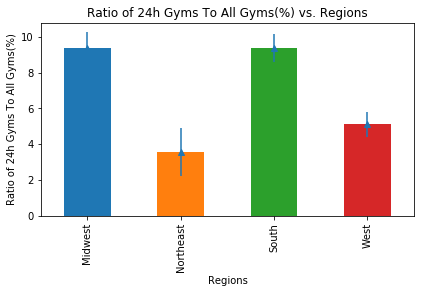

In [89]:
import scipy
regions = list(region_df["region"])
for i in range(len(regions)):
    region_df.loc[i, "gym_ratio_e"] = scipy.stats.sem(list(mega_df[mega_df["region"]==regions[i]]["gym_ratio"]))

region_df.plot(kind="bar", x="region", y="total_24_gyms_per_k_people", legend=None)
plt.xlabel("Regions")
plt.ylabel(gym_ratio_label)
x = region_df["region"]

e = region_df["gym_ratio_e"]
y = region_df["gym_ratio"]
plt.errorbar(x, y, e, linestyle='None', marker='^')
plt.tight_layout()
plt.title(f"{gym_ratio_label} vs. Regions")
plt.savefig(f"{gym_ratio_label} vs. Regions.png", bbox_inches='tight')

In [ ]:
import scipy
regions = list(region_df["region"])
for i in range(len(regions)):
    region_df.loc[i, "gym_ratio_e"] = scipy.stats.sem(list(mega_df[mega_df["region"]==regions[i]]["gym_ratio"]))

region_df.plot(kind="bar", x="region", y="gym_ratio", legend=None)
plt.xlabel("Regions")
plt.ylabel(gym_ratio_label)
x = region_df["region"]

e = region_df["gym_ratio_e"]
y = region_df["gym_ratio"]
plt.errorbar(x, y, e, linestyle='None', marker='^')
plt.tight_layout()
plt.title(f"{gym_ratio_label} vs. Regions")
plt.savefig(f"{gym_ratio_label} vs. Regions.png", bbox_inches='tight')

Text(32.4705,0.5,'Ratio of 24h Gyms To All Gyms(%)')

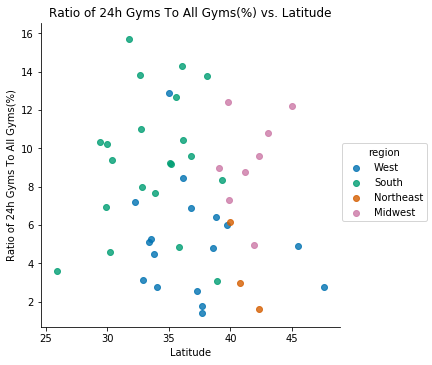

In [33]:
x_label = "Latitude"
sns.lmplot(y="gym_ratio", x="latitude", data=mega_df,\
           fit_reg=False, palette="colorblind", hue="region")
plt.title(f"{gym_ratio_label} vs. {x_label}")
plt.xlabel(x_label)
plt.ylabel(gym_ratio_label)

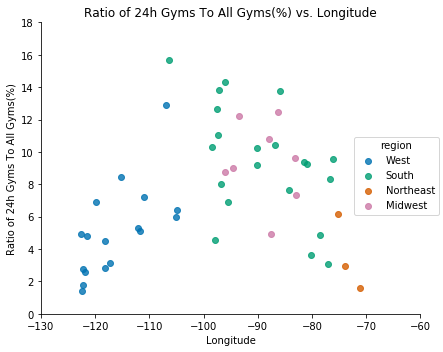

In [54]:
x_label = "Longitude"
sns.lmplot(y="gym_ratio", x="longitude", data=mega_df,\
           fit_reg=False, palette="colorblind", hue="region")
plt.title(f"{gym_ratio_label} vs. {x_label}")
plt.xlabel(x_label)
plt.ylabel(gym_ratio_label)
plt.xlim(-130, -60)
plt.ylim(0, 18)
plt.tight_layout()
plt.savefig(f"{gym_ratio_label} vs. {x_label}.png")

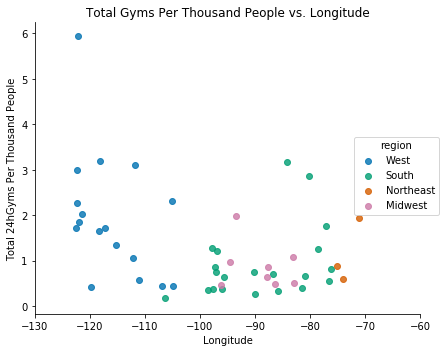

In [133]:
x_label = "Longitude"
sns.lmplot(y="total_gyms_per_k_people", x="longitude", data=mega_df,\
           fit_reg=False, palette="colorblind", hue="region")
plt.title(f"Total Gyms Per Thousand People vs. {x_label}")
plt.xlabel(x_label)
plt.ylabel("Total 24hGyms Per Thousand People")
plt.xlim(-130, -60)
plt.tight_layout()
plt.savefig(f"Total Gyms Per Thousand People vs. {x_label}.png")

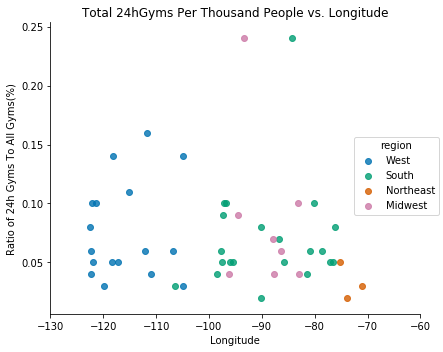

In [131]:
x_label = "Longitude"
sns.lmplot(y="total_24_gyms_per_k_people", x="longitude", data=mega_df,\
           fit_reg=False, palette="colorblind", hue="region")
plt.title(f"Total 24hGyms Per Thousand People vs. {x_label}")
plt.xlabel(x_label)
plt.ylabel(gym_ratio_label)
plt.xlim(-130, -60)
plt.tight_layout()
plt.savefig(f"Total 24hGyms Per Thousand People vs. {x_label}.png")

Text(32.4705,0.5,'24h gym vs. non-24h gym %')

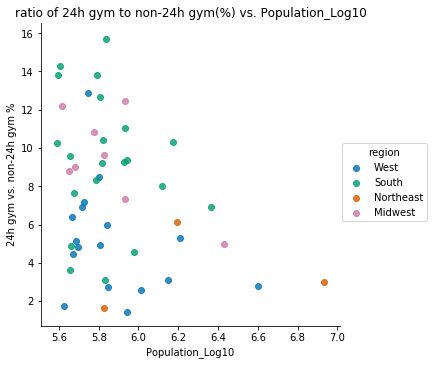

In [129]:
x_label = "Population_Log10"
sns.lmplot(y="gym_ratio", x="population_log10", data=mega_df,\
           fit_reg=False, palette="colorblind", hue="region")
plt.title(f"ratio of 24h gym to non-24h gym(%) vs. {x_label}")
plt.xlabel(x_label)
plt.ylabel("24h gym vs. non-24h gym %")

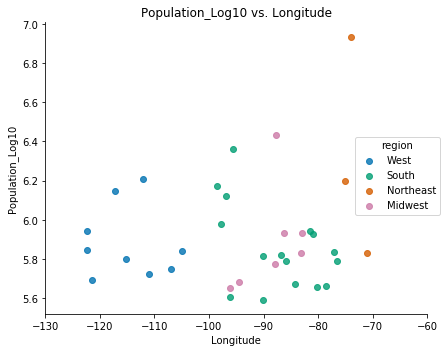

In [36]:
x_label = "Longitude"
y_label = "Population_Log10"
sns.lmplot(y="population_log10", x="longitude", data=df[df["precipitation"]!=0], fit_reg=False, palette="colorblind", hue="region")
plt.title(f"{y_label} vs. {x_label}")
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.tight_layout()
plt.xlim(-130, -60)
plt.savefig(f"{y_label} vs. {x_label}.png")

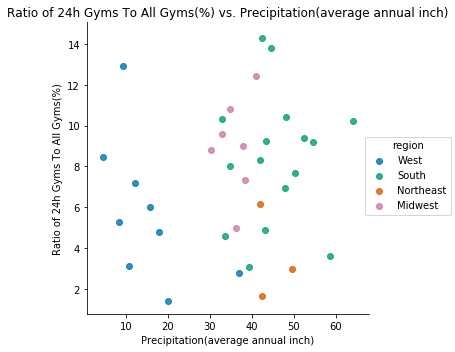

In [138]:
x_label = "Precipitation(average annual inch)"
y_label = gym_ratio_label
sns.lmplot(y="gym_ratio", x="precipitation", data=df[df["precipitation"]!=0], fit_reg=False, palette="colorblind", hue="region")
plt.title(f"{y_label} vs. {x_label}")
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.tight_layout()
plt.savefig(f"{y_label} vs. {x_label}.png")

(6, 18)

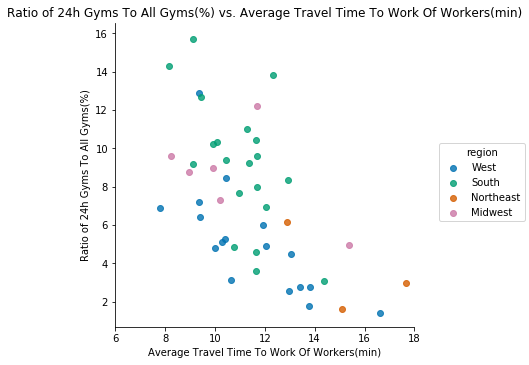

In [37]:
x_label = "Average Travel Time To Work Of Workers(min)"
sns.lmplot(y="gym_ratio", x="commute/person", data=mega_df,\
           fit_reg=False, palette="colorblind", hue="region")
plt.title(f"{gym_ratio_label} vs. {x_label}")
plt.xlabel(x_label)
plt.ylabel(gym_ratio_label)
plt.xlim(6,18)

(30, 40)

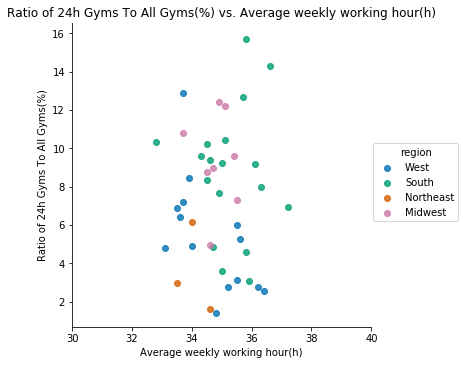

In [38]:
x_label = "Average weekly working hour(h)"
sns.lmplot(y="gym_ratio", x="weekly hour", data=mega_df.dropna(),\
           fit_reg=False, palette="colorblind", hue="region")
plt.title(f"{gym_ratio_label} vs. {x_label}")
plt.xlabel(x_label)
plt.ylabel(gym_ratio_label)
plt.xlim(30,40)

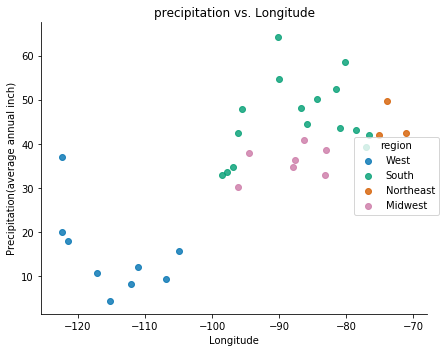

In [39]:
x_label = "Longitude"
y_label = "Precipitation(average annual inch)"
sns.lmplot(y="precipitation", x="longitude", data=df[df["precipitation"]!=0], fit_reg=False, palette="colorblind", hue="region")
plt.title(f"precipitation vs. {x_label}")
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.tight_layout()
plt.savefig(f"Precipitation vs. {x_label}.png")

(20, 100)

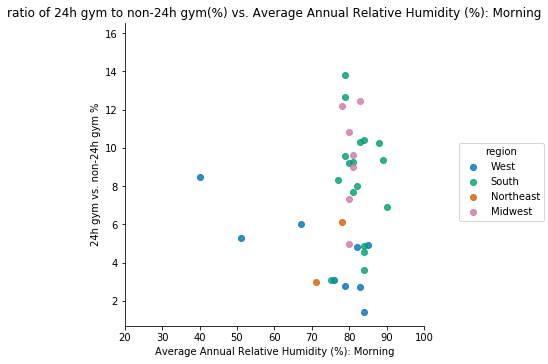

In [40]:
x_label = "Average Annual Relative Humidity (%): Morning"
sns.lmplot(y="gym_ratio", x="humidity_morning", data=mega_df.dropna(),\
           fit_reg=False, palette="colorblind", hue="region")
plt.title(f"ratio of 24h gym to non-24h gym(%) vs. {x_label}")
plt.xlabel(x_label)
plt.ylabel("24h gym vs. non-24h gym %")
plt.xlim(20,100)

(10, 80)

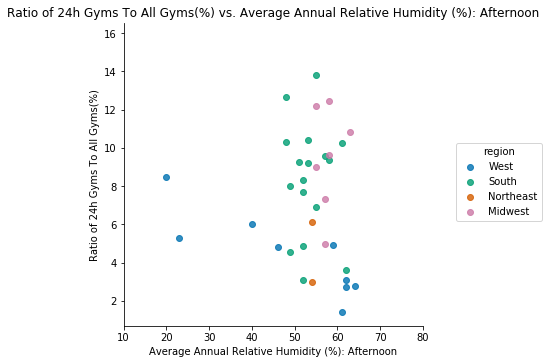

In [41]:
x_label = "Average Annual Relative Humidity (%): Afternoon"
sns.lmplot(y="gym_ratio", x="humidity_afternoon", data=mega_df.dropna(),\
           fit_reg=False, palette="colorblind", hue="region")
plt.title(f"{gym_ratio_label} vs. {x_label}")
plt.xlabel(x_label)
plt.ylabel(gym_ratio_label)
plt.xlim(10, 80)

Text(32.4705,0.5,'Ratio of 24h Gyms To All Gyms(%)')

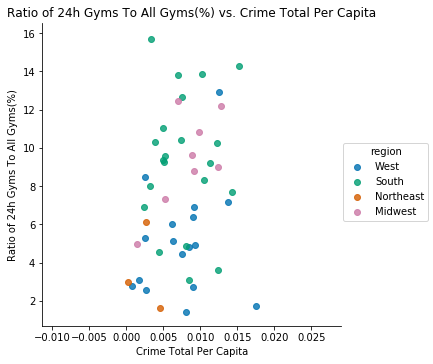

In [42]:
x_label = "Crime Total Per Capita"
sns.lmplot(y="gym_ratio", x="crime_total_per_capita", data=mega_df.dropna(),\
           fit_reg=False, palette="colorblind", hue="region")
plt.title(f"{gym_ratio_label} vs. {x_label}")
plt.xlabel(x_label)
plt.ylabel(gym_ratio_label)

(35, 75)

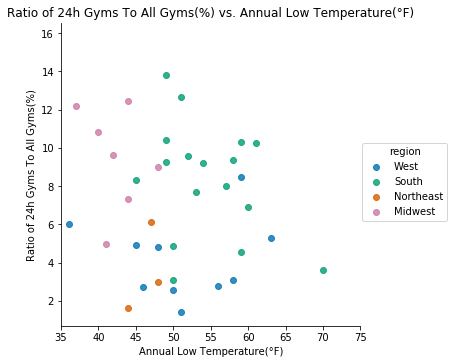

In [43]:
x_label = "Annual Low Temperature(°F)"
sns.lmplot(y="gym_ratio", x="low_temp", data=mega_df.dropna(),\
           fit_reg=False, palette="colorblind", hue="region")
plt.title(f"{gym_ratio_label} vs. {x_label}")
plt.xlabel(x_label)
plt.ylabel(gym_ratio_label)
plt.xlim(35, 75)

# Scatter Plot On Map:

In [ ]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.offline as py
import pandas as pd
df = pd.read_csv("cleaning_output.csv")
df.head()

In [105]:
df["text"] = df["area"] + ", " + df["state"] + "" + "Gym Ratios"

scl = [ [0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
    [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"] ]

data = [ dict(
        type = "scattergeo",
        locationmode = "USA-states",
        lon = df["longitude"],
        lat = df["latitude"],
        text = df["text"],
        mode = "markers",
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = "square",
            line = dict(
                width=1,
                color="rgba(102, 102, 102)"
            ),
            colorscale = scl,
            cmin = df["gym_ratio"].min(),
            color = df["gym_ratio"],
            cmax = df["gym_ratio"].max(),
            colorbar=dict(
                title="24h gyms/total gyms ratio (%)"
            )
        ))]

layout = dict(
        title = F"Cities With Most {gym_ratio_label}<br>(Hover for city names)",
        colorbar = True,
        geo = dict(
            scope="usa",
            projection=dict( type="albers usa" ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename="d3-airports" )

In [106]:
df["text"] = df["area"] + ", " + df["state"] + "" + "Population"

scl = [ [0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
    [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"] ]

data = [ dict(
        type = "scattergeo",
        locationmode = "USA-states",
        lon = df["longitude"],
        lat = df["latitude"],
        text = df["text"],
        mode = "markers",
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = "square",
            line = dict(
                width=1,
                color="rgba(102, 102, 102)"
            ),
            colorscale = scl,
            cmin = df["population_log10"].min(),
            color = df["population_log10"],
            cmax = df["population_log10"].max(),
            colorbar=dict(
                title="Population"
            )
        ))]

layout = dict(
        title = "Cities With Most Population<br>(Hover for city names)",
        colorbar = True,
        geo = dict(
            scope="usa",
            projection=dict( type="albers usa" ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename="d3-airports" )

In [108]:
df["text"] = df["area"] + ", " + df["state"] + "" + "precipitation"

scl = [ [0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
    [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"] ]

data = [ dict(
        type = "scattergeo",
        locationmode = "USA-states",
        lon = df["longitude"],
        lat = df["latitude"],
        text = df["text"],
        mode = "markers",
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = "square",
            line = dict(
                width=1,
                color="rgba(102, 102, 102)"
            ),
            colorscale = scl,
            cmin = df["precipitation"].min(),
            color = df["precipitation"],
            cmax = df["precipitation"].max(),
            colorbar=dict(
                title="precipitation"
            )
        ))]

layout = dict(
        title = "Cities With Most Precipitation<br>(Hover for city names)",
        colorbar = True,
        geo = dict(
            scope="usa",
            projection=dict( type="albers usa" ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename="d3-airports" )

In [139]:
df["text"] = df["area"] + ", " + df["state"] + "" + "temperature"

scl = [ [0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
    [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"] ]

data = [ dict(
        type = "scattergeo",
        locationmode = "USA-states",
        lon = df["longitude"],
        lat = df["latitude"],
        text = df["text"],
        mode = "markers",
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = "square",
            line = dict(
                width=1,
                color="rgba(102, 102, 102)"
            ),
            colorscale = scl,
            cmin = 35,
            color = df["low_temp"],
            cmax = df["low_temp"].max(),
            colorbar=dict(
                title="temperature"
            )
        ))]

layout = dict(
        title = "Cities With Lowest Annual Temperature<br>(Hover for city names)",
        colorbar = True,
        geo = dict(
            scope="usa",
            projection=dict( type="albers usa" ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename="d3-airports" )

# Per Capita Graphs

In [112]:
y = "total_24_gyms_per_k_people"
df["text"] = df["area"] + ", " + df["state"] + "" + "Total 24h gyms per 1k people"

scl = [ [0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
    [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"] ]

data = [ dict(
        type = "scattergeo",
        locationmode = "USA-states",
        lon = df["longitude"],
        lat = df["latitude"],
        text = df["text"],
        mode = "markers",
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = "square",
            line = dict(
                width=1,
                color="rgba(102, 102, 102)"
            ),
            colorscale = scl,
            cmin = df[y].min(),
            color = df[y],
            cmax = df[y].max(),
            colorbar=dict(
                title="24h gyms per 1k people"
            )
        ))]

layout = dict(
        title = F"Cities With Most 24h Gym/Population(K)<br>(Hover for city names)",
        colorbar = True,
        geo = dict(
            scope="usa",
            projection=dict( type="albers usa" ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename="d3-airports" )

In [116]:
y = "total_gyms_per_k_people"
df["text"] = df["area"] + ", " + df["state"] + "" + "Total gyms per 1k people"

scl = [ [0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
    [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"] ]

data = [ dict(
        type = "scattergeo",
        locationmode = "USA-states",
        lon = df["longitude"],
        lat = df["latitude"],
        text = df["text"],
        mode = "markers",
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = "square",
            line = dict(
                width=1,
                color="rgba(102, 102, 102)"
            ),
            colorscale = scl,
            cmin = df[y].min(),
            color = df[y],
            cmax = df[y].max(),
            colorbar=dict(
                title="Gyms per 1k people"
            )
        ))]

layout = dict(
        title = F"Cities With Most Gyms/Population(K)<br>(Hover for city names)",
        colorbar = True,
        geo = dict(
            scope="usa",
            projection=dict( type="albers usa" ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename="d3-airports" )